# Simple Linear Regression implementation from scratch

#### Day 3 was spent in learning the fundamentals of simple linear regression and the indepth math about the optimisation techniques and thee accuracy metrics. Today, that is on day 4, is the implementation part. The simple linear regression is to be implemented using all three optimisation techniques, namely:
1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini Batch Gradient Descent

## First, let's import the necessary libraries.

In [494]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from random import random, shuffle, randint
import os
%matplotlib inline

#### For this, the GRE scores v/s Chance of Admission dataset. Here the dependant variable will be the chance of Admit and the independant variable will be the GRE scores. We can take the inverse of this too, and it **will imply correlation**, but it **doesn't imply causation.** Hence the choice. 
## Now let's import the dataset

In [238]:

os.chdir('/home/thedarkcoder/Desktop/Projects/51 days of ML/Simple linear regression project/')
dataset = pd.read_csv('Admission_Predict.csv')

## Let's take a look at the data

In [368]:
print(dataset.sample(10))
print("\nLength - " + str(len(dataset)) +"\n")
print("Null values - ")
print(dataset.isnull().sum())

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
314         315        305          105                  2  3.0   4.0  8.13   
288         289        314          104                  4  5.0   5.0  9.02   
385         386        335          117                  5  5.0   5.0  9.82   
36           37        299          106                  2  4.0   4.0  8.40   
44           45        326          113                  5  4.5   4.0  9.40   
18           19        318          110                  3  4.0   3.0  8.80   
64           65        325          111                  3  3.0   3.5  8.70   
245         246        328          110                  4  4.0   2.5  9.02   
193         194        336          118                  5  4.5   5.0  9.53   
301         302        319          108                  2  2.5   3.0  8.76   

     Research  Chance of Admit   
314         0              0.66  
288         0              0.82  
385         1              0.96  

#### No missing data. Hence, no need for preprocessing.
## Now let's select the dependent and independent variables. 
#### Since we are doing simple linear regression, we will chose only one dependent variable

In [369]:
X = dataset["GRE Score"]
y = dataset.iloc[:, -1]
print(X, "\n", y)

0      337
1      324
2      316
3      322
4      314
      ... 
395    324
396    325
397    330
398    312
399    333
Name: GRE Score, Length: 400, dtype: int64 
 0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64


## Now let's plot the data and check the relation.

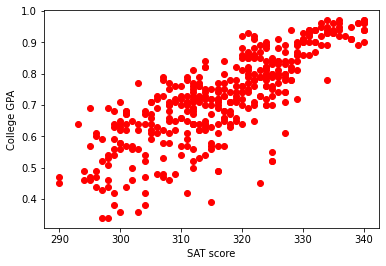

In [370]:
plt.scatter(X, y, c="red")
plt.xlabel("SAT score")
plt.ylabel("College GPA")
plt.show()

#### The data looks linear. Now,
## Lets build a simple linear regression model

In [507]:
class SimpleLinearRegression:
    def __init__(self, lr=0.00001, epoch=1000, optimizer="grad", batch_size=32):
        self.constant = 0
        self.weight = 0
        self.learning_rate = lr
        self.epochs = epoch
        self.optimizer = optimizer
        self.batch_size = batch_size
    def fit(self, X, y):
        N = X.shape[0]
        for _ in range(self.epochs):
            y_pred = X * self.weight + self.constant
            if self.optimizer == 'grad':
                self.gradient_descent(y_pred, y, X, N)
            elif self.optimizer == 'sgd':
                self.sgd(y_pred, y, X, N)
            elif self.optimizer == 'mini_batch':
                self.mini_batch(y_pred, y, X, N)
    def gradient_descent(self, y_pred, y, X, N):
        dw = (1/N) * np.dot(X.T, (y_pred - y)) 
        db = (1/N) * np.sum(y_pred - y)
        self.weight -= self.learning_rate * dw
        self.constant -= self.learning_rate * db
    def sgd(self, y_pred, y, X, N):
        index = randint(0, N -1)
        dw = (y_pred[index] - y[index]) * x[index]
        db = (y_pred[index] - y[index])
        self.weight -= self.learning_rate * dw
        self.constant -= self.learning_rate * db
    def mini_batch(self, y_pred, y, X, N):
        batches = N/self.batch_size
        batch_num = randint(0, batches - 1)
        start = batch_num * self.batch_size
        dw = (1/self.batch_size) * np.dot(X[start: start + self.batch_size].T, (y_pred[start: start + self.batch_size] - y[start: start + self.batch_size]))
        db = (1/self.batch_size) * sum(y_pred[start: start + self.batch_size] - y[start: start + self.batch_size])
        self.weight -= self.learning_rate * dw
        self.constant -= self.learning_rate * db
    
    def predict(self, X):
        return self.weight * X + self.constant

In [508]:
lr = SimpleLinearRegression()
X_train, y_train = np.array(X[:-40]), np.array(y[:-40])
X_test = np.array(X[-40:])

In [509]:
lr.fit(X_train, y_train)

In [510]:
lr.constant, lr.weight

(-2.25832585867144e-05, 0.0022970714735425276)

In [516]:
lr.predict(X_test.reshape(-1, 1))

array([[0.77514304],
       [0.89143862],
       [0.93020382],
       [0.62008226],
       [0.68792135],
       [0.85267343],
       [0.75576044],
       [0.66853875],
       [0.54255187],
       [0.57162576],
       [0.65884745],
       [0.79452564],
       [0.91082122],
       [0.76545174],
       [0.70730395],
       [0.60069966],
       [0.53286057],
       [0.46502148],
       [0.59100836],
       [0.66853875],
       [0.77514304],
       [0.74606914],
       [0.79452564],
       [0.56193447],
       [0.94958642],
       [0.90112992],
       [0.58131706],
       [0.62977356],
       [0.52316927],
       [0.75576044],
       [0.69761265],
       [0.73637784],
       [0.81390823],
       [0.72668654],
       [0.84298213],
       [0.79452564],
       [0.80421693],
       [0.85267343],
       [0.67823005],
       [0.88174733]])

In [520]:
from sklearn.metrics import r2_score
r2_score(np.array(y[-40:]), lr.predict(X_test))

0.7525956729607869